In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn .metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Quick EDA

## Train_csv

In [2]:
train_df = pd.read_csv('DataLouna/train.csv')
train_df.head()

,map_id,team1_id,team2_id,map_name,who_win
0,289,6665,7718,Ancient,0
1,715,4411,10577,Inferno,0
2,157,11251,9455,Nuke,1
3,524,4608,7532,Mirage,0
4,404,8637,6667,Overpass,1


In [3]:
train_df.shape

(713, 5)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   map_id    713 non-null    int64 
 1   team1_id  713 non-null    int64 
 2   team2_id  713 non-null    int64 
 3   map_name  713 non-null    object
 4   who_win   713 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
train_df.isna().any().sum()

0

In [6]:
train_df.who_win.value_counts() # balanced

0    386
1    327
Name: who_win, dtype: int64

<AxesSubplot: xlabel='map_name', ylabel='count'>

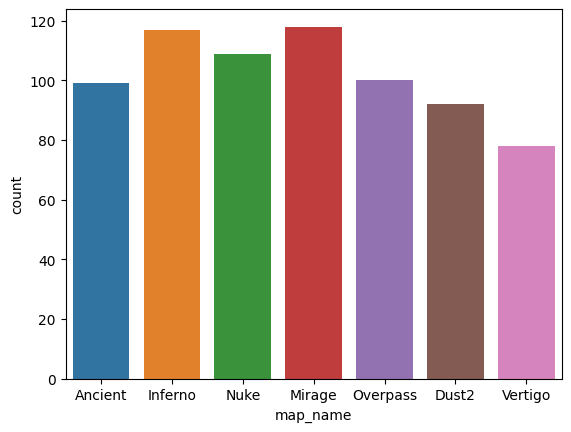

In [7]:
sns.countplot(x=train_df.map_name) # also quite balanced

## Players_feats_csv

In [8]:
players_df = pd.read_csv('DataLouna/players_feats.csv')
players_df.head()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,...,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name,map_id
0,4954,90,42.2,112,0.80,76.3,5.9,6,156,0.58,...,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635
1,5794,45,60.0,57,0.79,82.3,10.9,3,68,0.66,...,96,54,34,1.59,1.17,70.4,16.7,7532,Ancient,635
2,4954,156,51.9,167,0.93,63.5,3.4,10,265,0.59,...,22,26,19,1.37,1.10,88.5,20.5,6665,Dust2,583
3,5794,449,53.5,427,1.05,86.7,13.1,23,618,0.73,...,104,62,49,1.27,1.10,79.0,17.4,7532,Dust2,583
4,7998,173,32.9,130,1.33,82.4,2.9,9,225,0.77,...,19,27,25,1.08,1.08,81.5,16.2,4608,Dust2,439


In [9]:
players_df.shape

(1486, 128)

In [10]:
players_df.describe()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,...,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_id
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,...,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1482.000000,1486.000000,1486.000000,1486.000000
mean,6808.845222,237.353297,45.623553,239.849260,0.990875,72.572678,5.262988,13.662853,364.810229,0.642517,...,133.167564,14.987214,29.280619,25.924630,1.129105,0.966097,69.634615,13.871400,7461.635262,371.000000
std,4031.792795,126.932320,9.999153,124.403672,0.237200,11.874143,2.626014,6.904256,185.463054,0.122343,...,80.731101,34.329486,19.535033,16.981899,0.583538,0.284628,20.948070,6.240919,2255.926813,214.557636
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4411.000000,0.000000
25%,3669.000000,148.000000,41.000000,156.000000,0.870000,66.600000,3.500000,9.000000,237.250000,0.580000,...,77.000000,-5.000000,15.000000,13.000000,0.800000,0.900000,66.700000,10.525000,5752.000000,185.250000
50%,7938.000000,224.000000,46.700000,227.000000,0.960000,72.500000,4.800000,13.000000,347.000000,0.640000,...,129.000000,7.000000,27.000000,24.000000,1.060000,1.000000,74.250000,13.800000,7020.000000,371.000000
75%,9115.000000,307.000000,51.100000,310.750000,1.080000,78.975000,6.600000,18.000000,476.000000,0.690000,...,184.000000,33.000000,42.000000,36.000000,1.380000,1.110000,81.075000,17.700000,9455.000000,556.750000
max,14359.000000,769.000000,81.800000,711.000000,3.890000,152.400000,21.000000,41.000000,1097.000000,1.670000,...,385.000000,165.000000,102.000000,96.000000,5.000000,2.150000,100.000000,50.000000,11726.000000,742.000000


In [11]:
players_df.isna().any().sum()

5

In [12]:
players_df.columns.to_list()

['p1_id',
 'p1_total_kills',
 'p1_headshots',
 'p1_total_deaths',
 'p1_kd_ratio',
 'p1_damage_per_round',
 'p1_grenade_damage_per_round',
 'p1_maps_played',
 'p1_rounds_played',
 'p1_kills_per_round',
 'p1_assists_per_round',
 'p1_deaths_per_round',
 'p1_saved_by_teammate_per_round',
 'p1_saved_teammates_per_round',
 'p1_rating',
 'p1_kill_death',
 'p1_kill_round',
 'p1_rounds_with_kills',
 'p1_kill_death_difference',
 'p1_total_opening_kills',
 'p1_total_opening_deaths',
 'p1_opening_kill_ratio',
 'p1_opening_kill_rating',
 'p1_team_win_percent_after_first_kill',
 'p1_first_kill_in_won_rounds',
 'p2_id',
 'p2_total_kills',
 'p2_headshots',
 'p2_total_deaths',
 'p2_kd_ratio',
 'p2_damage_per_round',
 'p2_grenade_damage_per_round',
 'p2_maps_played',
 'p2_rounds_played',
 'p2_kills_per_round',
 'p2_assists_per_round',
 'p2_deaths_per_round',
 'p2_saved_by_teammate_per_round',
 'p2_saved_teammates_per_round',
 'p2_rating',
 'p2_kill_death',
 'p2_kill_round',
 'p2_rounds_with_kills',
 'p2

In [13]:
players_df.drop(columns=['p1_id', 'p2_id', 'p3_id', 'p4_id', 'p5_id', 'map_name'], inplace=True)

### Outliers check:

In [14]:
def outlier_check(df, feature: str) -> None:
    fig, axes = plt.subplots(3, 2, figsize=(6, 6))
    for i, ax in zip(range(1, 6), axes.ravel()): 
        sns.kdeplot(data=df, x=f'p{i}_{feature}', ax=ax)
        ax.yaxis.set_visible(False)
        ax.set_title('')
    
    fig.suptitle(feature, fontsize=10)
    plt.show();

In [15]:
cols = players_df.columns.to_list()
features = []
for i in cols:
    if i[0] == 'p':
        features.append(i[3:])

features = set(features)
print(features)

{'opening_kill_ratio', 'deaths_per_round', 'rounds_with_kills', 'rating', 'headshots', 'kill_round', 'saved_by_teammate_per_round', 'total_opening_deaths', 'total_kills', 'team_win_percent_after_first_kill', 'kill_death_difference', 'rounds_played', 'saved_teammates_per_round', 'first_kill_in_won_rounds', 'opening_kill_rating', 'total_opening_kills', 'damage_per_round', 'grenade_damage_per_round', 'kills_per_round', 'maps_played', 'kill_death', 'total_deaths', 'assists_per_round', 'kd_ratio'}


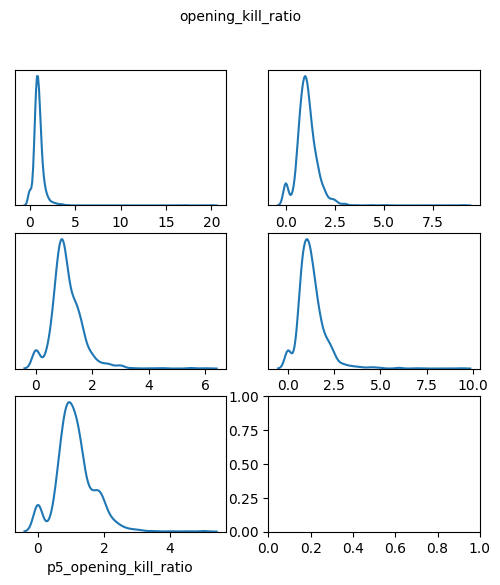

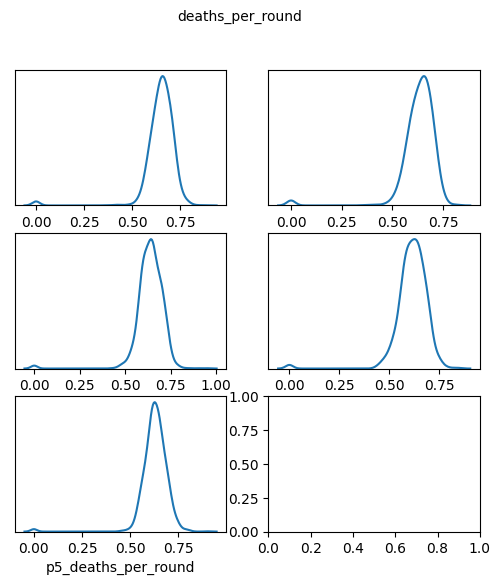

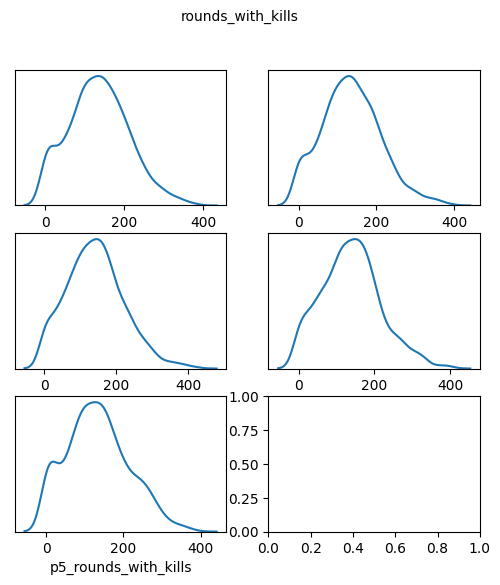

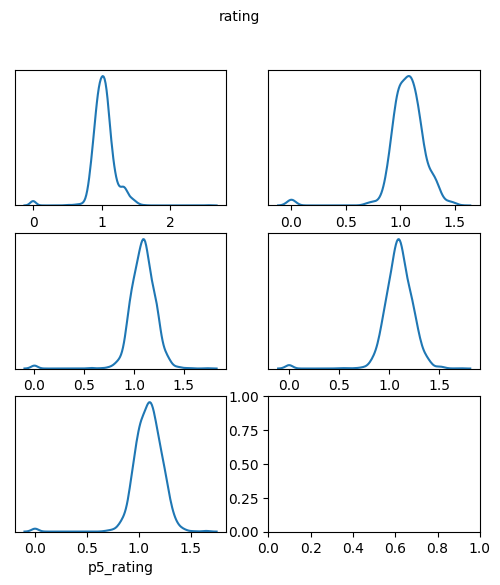

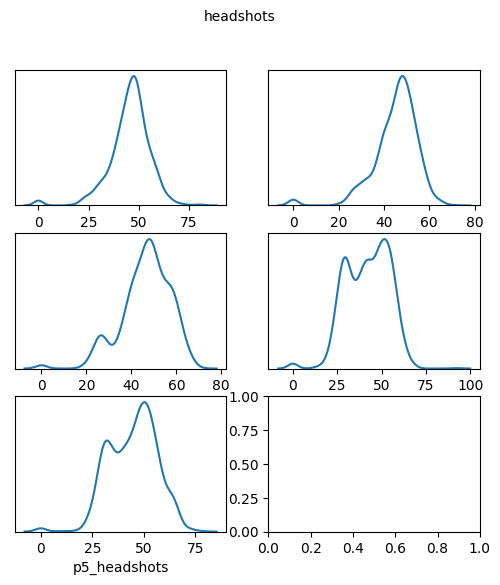

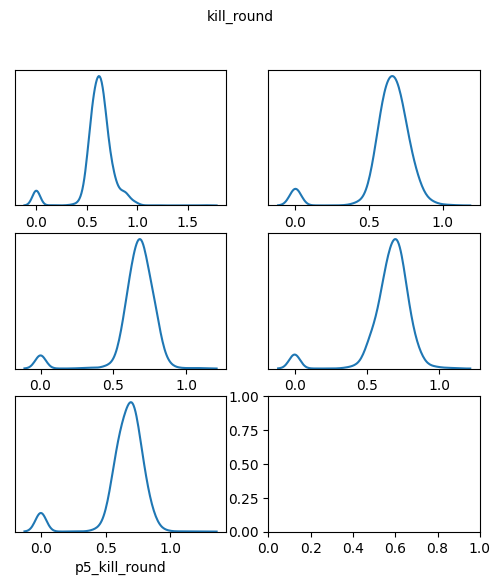

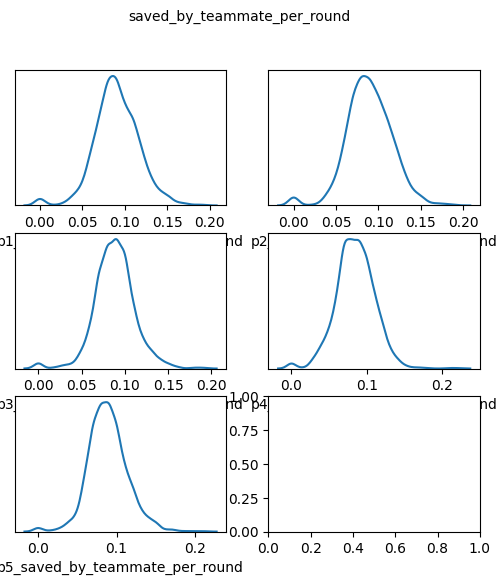

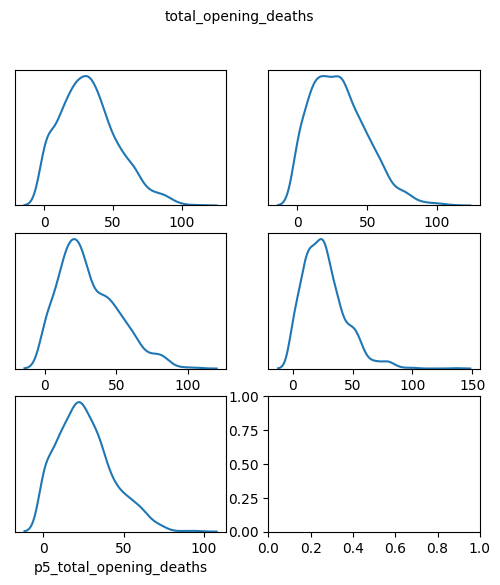

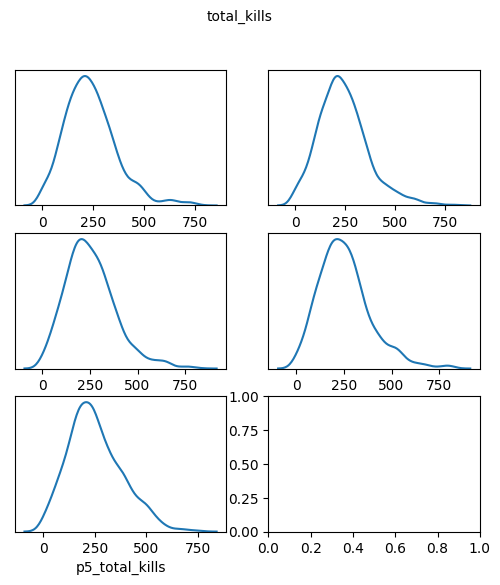

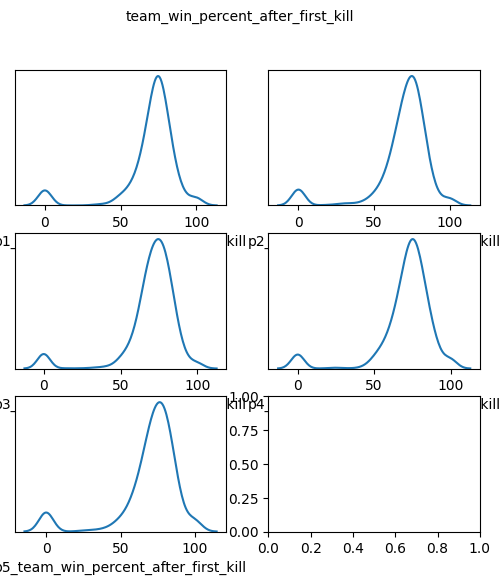

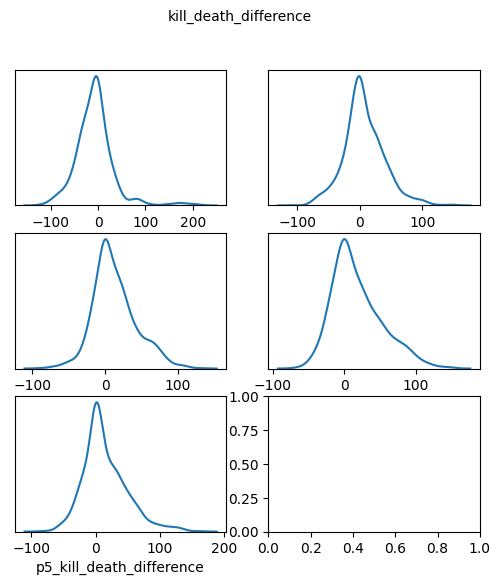

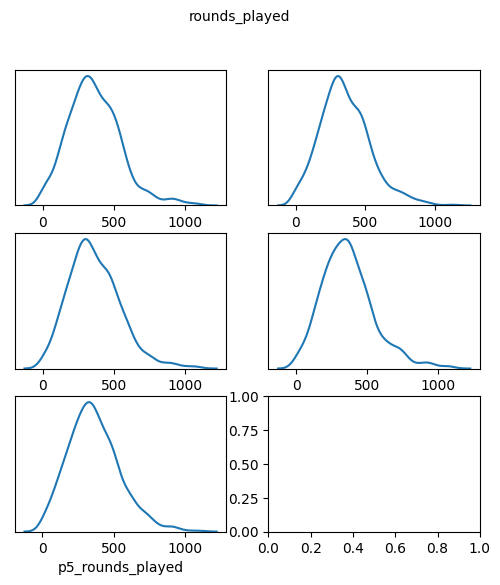

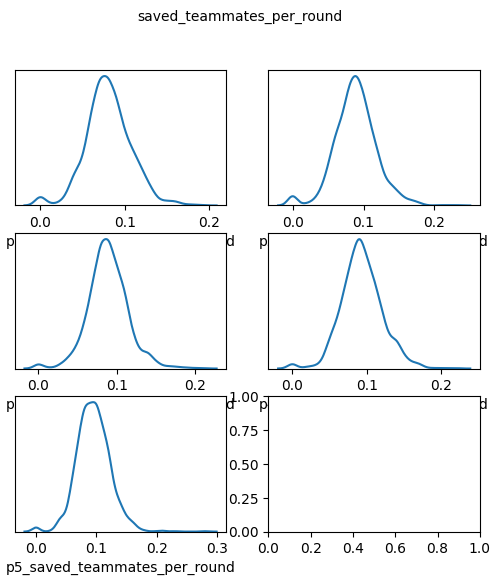

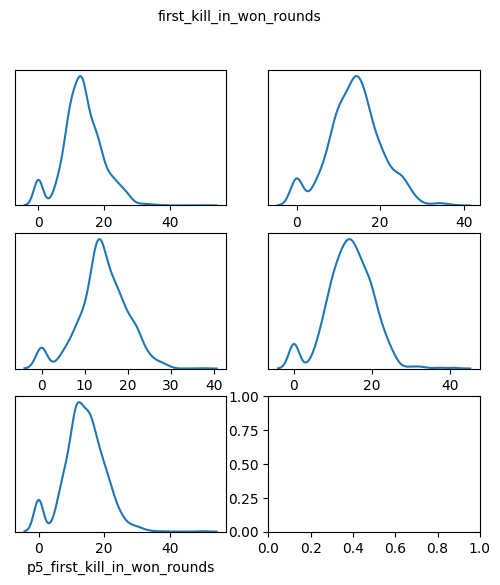

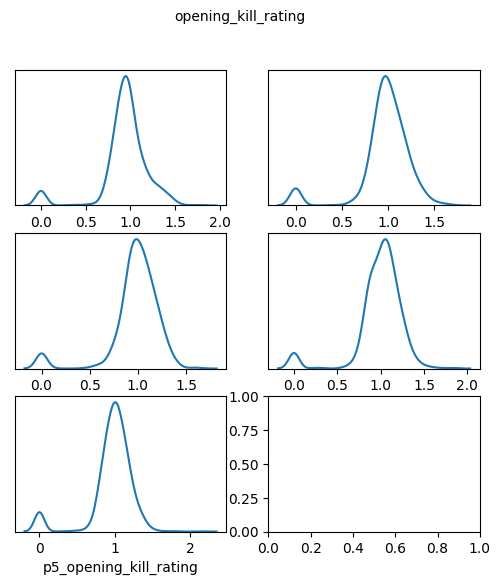

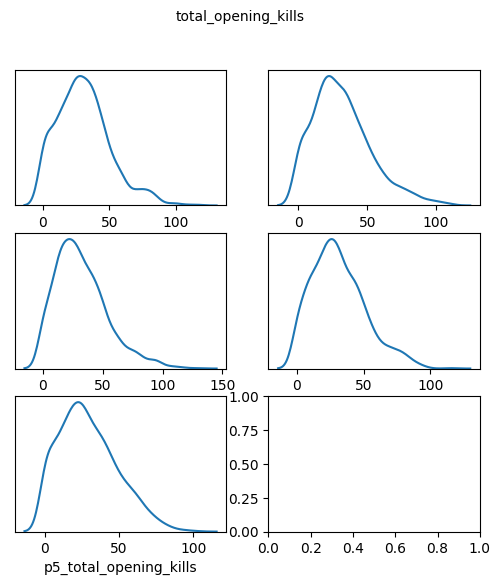

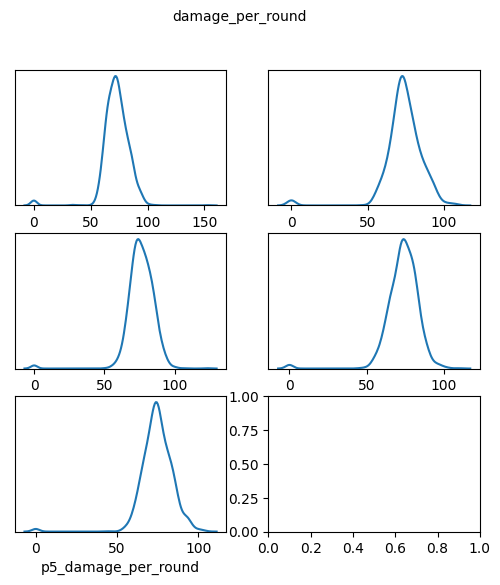

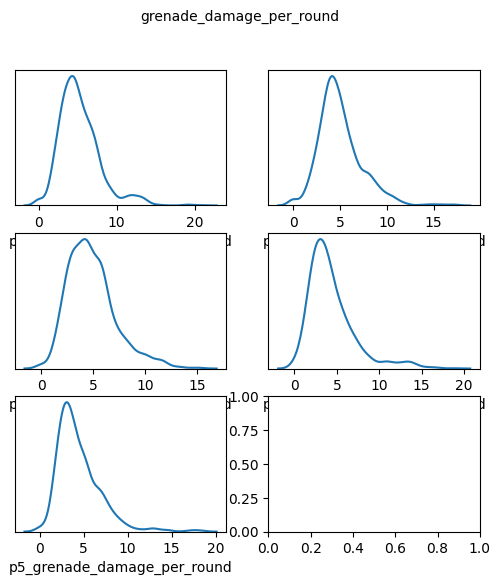

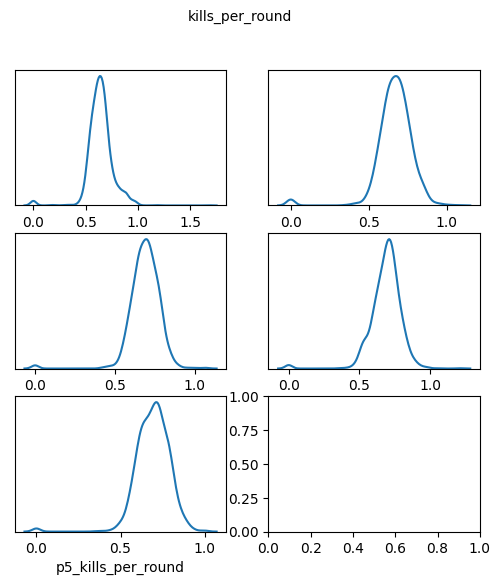

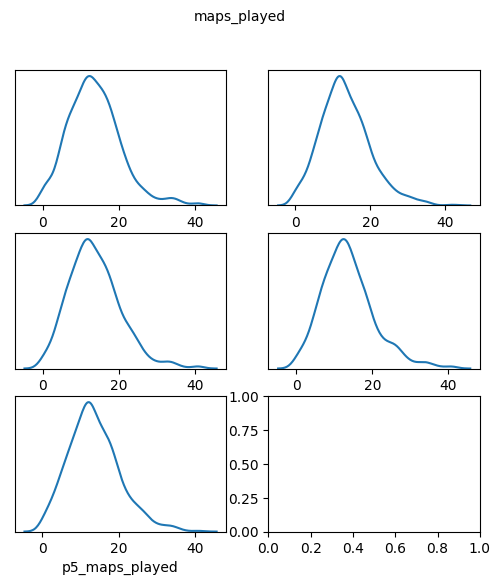

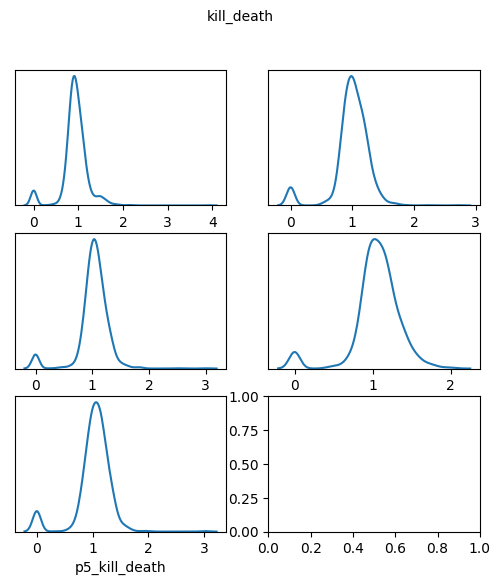

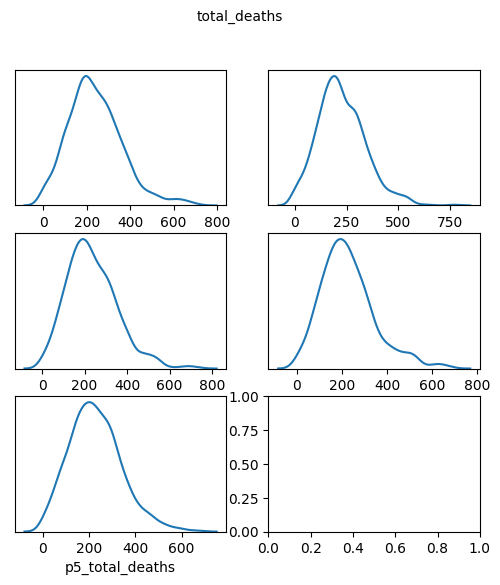

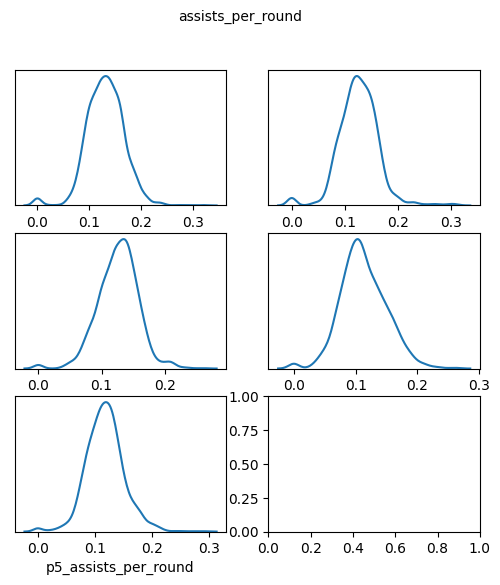

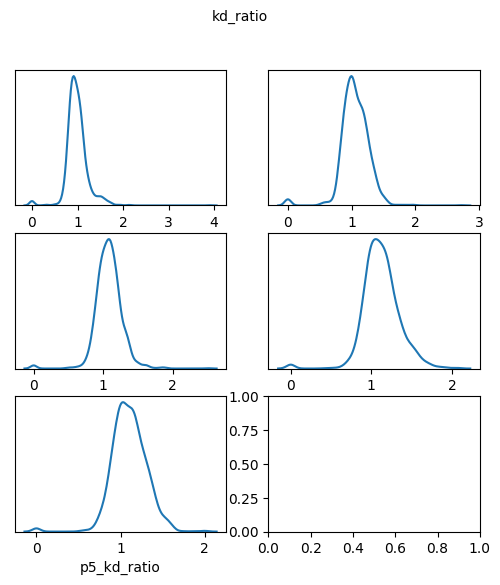

In [16]:
for f in features:
    outlier_check(players_df, f)

Можно заметить выбросы - много нулевых значений. В идеале от них нужно избавиться, но маленький размер датасета не позволяет нам это сделать. НАНы в будущем тоже будем заполнять, а не дропать

# Preprocessing

In [18]:
train_df.drop(columns='map_name', inplace=True)

In [19]:
train_df

,map_id,team1_id,team2_id,who_win
0,289,6665,7718,0
1,715,4411,10577,0
2,157,11251,9455,1
3,524,4608,7532,0
4,404,8637,6667,1
...,...,...,...,...
708,709,6667,4773,0
709,528,9215,5995,1
710,163,4869,9565,1
711,96,10426,4991,1


In [20]:
# Inner merge, т.к. нет смысла если нет статистики хотя бы для одной из команд 
df_t1 = pd.merge(train_df, players_df, how='inner', left_on=['map_id', 'team1_id'], right_on=['map_id', 'team_id']) 
df_t1_t2 = pd.merge(df_t1, players_df, how='inner', left_on=['map_id', 'team2_id'], right_on=['map_id', 'team_id'], suffixes=('', '_t2'))
df_t1_t2

,map_id,team1_id,team2_id,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,...,p5_kill_round_t2,p5_rounds_with_kills_t2,p5_kill_death_difference_t2,p5_total_opening_kills_t2,p5_total_opening_deaths_t2,p5_opening_kill_ratio_t2,p5_opening_kill_rating_t2,p5_team_win_percent_after_first_kill_t2,p5_first_kill_in_won_rounds_t2,team_id_t2
0,289,6665,7718,0,258,36.0,293,0.88,71.1,6.3,...,0.55,75,-34,21,20,1.05,1.06,76.2,19.0,7718
1,715,4411,10577,0,178,39.3,208,0.86,64.1,6.5,...,0.78,197,90,64,25,2.56,1.39,75.0,23.3,10577
2,157,11251,9455,1,494,52.8,397,1.24,94.0,5.8,...,0.55,101,-32,32,35,0.91,1.09,53.1,15.5,9455
3,524,4608,7532,0,474,29.1,304,1.56,86.9,2.4,...,0.54,109,-13,15,21,0.71,0.82,73.3,7.9,7532
4,404,8637,6667,1,217,55.8,248,0.88,64.8,4.6,...,0.72,122,26,20,10,2.00,1.01,80.0,12.4,6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,709,6667,4773,0,320,47.8,396,0.81,71.2,11.4,...,0.72,139,24,35,29,1.21,1.12,57.1,13.8,4773
709,528,9215,5995,1,203,50.2,131,1.55,82.1,3.4,...,0.00,0,0,0,0,0.00,0.00,0.0,0.0,5995
710,163,4869,9565,1,447,44.3,538,0.83,65.2,5.7,...,0.56,168,-43,29,36,0.81,0.87,69.0,10.2,9565
711,96,10426,4991,1,499,43.1,472,1.06,73.8,2.7,...,0.74,239,59,36,40,0.90,0.90,86.1,12.7,4991


In [21]:
df_t1_t2.isna().any().sum()

10

In [22]:
df_t1_t2.columns.to_list()

['map_id',
 'team1_id',
 'team2_id',
 'who_win',
 'p1_total_kills',
 'p1_headshots',
 'p1_total_deaths',
 'p1_kd_ratio',
 'p1_damage_per_round',
 'p1_grenade_damage_per_round',
 'p1_maps_played',
 'p1_rounds_played',
 'p1_kills_per_round',
 'p1_assists_per_round',
 'p1_deaths_per_round',
 'p1_saved_by_teammate_per_round',
 'p1_saved_teammates_per_round',
 'p1_rating',
 'p1_kill_death',
 'p1_kill_round',
 'p1_rounds_with_kills',
 'p1_kill_death_difference',
 'p1_total_opening_kills',
 'p1_total_opening_deaths',
 'p1_opening_kill_ratio',
 'p1_opening_kill_rating',
 'p1_team_win_percent_after_first_kill',
 'p1_first_kill_in_won_rounds',
 'p2_total_kills',
 'p2_headshots',
 'p2_total_deaths',
 'p2_kd_ratio',
 'p2_damage_per_round',
 'p2_grenade_damage_per_round',
 'p2_maps_played',
 'p2_rounds_played',
 'p2_kills_per_round',
 'p2_assists_per_round',
 'p2_deaths_per_round',
 'p2_saved_by_teammate_per_round',
 'p2_saved_teammates_per_round',
 'p2_rating',
 'p2_kill_death',
 'p2_kill_round',


In [23]:
cols_to_drop = ['map_id',
                'team1_id',
                'team2_id',
                'team_id',
                'team_id_t2']
df_t1_t2.drop(columns=cols_to_drop, inplace=True)

## Prepare test_df

In [24]:
test_df = pd.read_csv('DataLouna/test.csv')
test_df.head()

,index,map_id,team1_id,team2_id,map_name
0,713,309,5973,5752,Dust2
1,714,541,5973,5752,Vertigo
2,715,1,8297,7020,Nuke
3,716,392,8297,7020,Mirage
4,717,684,8297,7020,Overpass


In [25]:
test_df.drop(columns=['index', 'map_name'], inplace=True)

In [26]:
test_t1 = pd.merge(test_df, players_df, how='inner', left_on=['map_id', 'team1_id'], right_on=['map_id', 'team_id']) 
test_t1_t2 = pd.merge(test_t1, players_df, how='inner', left_on=['map_id', 'team2_id'], right_on=['map_id', 'team_id'], suffixes=('', '_t2'))
cols_to_drop = ['map_id',
                'team1_id',
                'team2_id',
                'team_id',
                'team_id_t2']
test_t1_t2.drop(columns=cols_to_drop, inplace=True)

# Modeling

In [27]:
from pycaret.classification import *
pycaret = setup(df_t1_t2, target='who_win')

,Description,Value
0,Session id,5156
1,Target,who_win
2,Target type,Binary
3,Original data shape,"(713, 241)"
4,Transformed data shape,"(713, 241)"
5,Transformed train set shape,"(499, 241)"
6,Transformed test set shape,"(214, 241)"
7,Numeric features,240
8,Rows with missing values,2.2%
9,Preprocess,True


In [28]:
best_models = compare_models(n_select=3, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5673,0.6004,0.5154,0.5332,0.5209,0.1271,0.1285,0.7310
lda,Linear Discriminant Analysis,0.5711,0.5856,0.5285,0.5367,0.5293,0.1361,0.1379,0.0180
rf,Random Forest Classifier,0.5592,0.5763,0.3802,0.5275,0.4408,0.0933,0.0968,0.0530
catboost,CatBoost Classifier,0.5551,0.5704,0.3893,0.5264,0.4428,0.0874,0.0923,10.4310
nb,Naive Bayes,0.5310,0.5699,0.5852,0.4941,0.5343,0.0698,0.0707,0.0160
et,Extra Trees Classifier,0.5550,0.5672,0.4107,0.5241,0.4573,0.0901,0.0936,0.0410
ada,Ada Boost Classifier,0.5371,0.5516,0.4893,0.4954,0.4885,0.0671,0.0674,0.0560
lightgbm,Light Gradient Boosting Machine,0.5189,0.5441,0.4324,0.4766,0.4506,0.0256,0.0258,0.1980
gbc,Gradient Boosting Classifier,0.5028,0.5392,0.4148,0.4596,0.4327,-0.0066,-0.0069,0.1780
xgboost,Extreme Gradient Boosting,0.5189,0.5187,0.4322,0.4764,0.4508,0.0253,0.0257,0.1420


In [29]:
best_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=5156, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        r

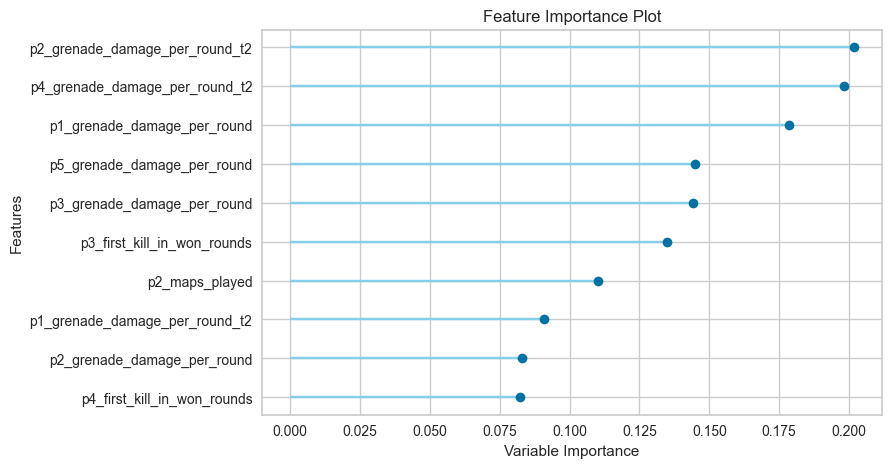

In [30]:
plot_model(best_models[0], 'feature')

In [31]:
# Предскажем двумя лучшими из них, потом будем ансамблировать
logreg_pred = predict_model(best_models[0], data=test_t1_t2)
test_logreg = deepcopy(test_df)
test_logreg['prediction'] = logreg_pred['prediction_label']
test_logreg.to_csv('DataLouna/logreg.csv')

In [32]:
rf_pred = predict_model(best_models[1], data=test_t1_t2)
test_rf = deepcopy(test_df)
test_rf['prediction'] = rf_pred['prediction_label']
test_rf.to_csv('DataLouna/randforest.csv')

## Ensemble

In [33]:
mean_imputer = SimpleImputer(strategy='mean')
imputed_df = mean_imputer.fit_transform(df_t1_t2)
imputed_df = pd.DataFrame(imputed_df, columns=df_t1_t2.columns)

In [34]:
# Split
y = imputed_df.who_win
X = imputed_df.drop('who_win', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [35]:
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=3898, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)

rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=3898, verbose=0, warm_start=False)

gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=3898, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [37]:
voting_clf = VotingClassifier(estimators=[('LogReg', lr), ('RandomForest', rf), ('GradBoost', gb)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)
preds = voting_clf.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, preds)
print(roc_auc)

0.5811688311688312


In [38]:
ensemble_pred = voting_clf.predict(scaler.transform(test_t1_t2))
test_ensemble = deepcopy(test_df)
test_ensemble['prediction'] = ensemble_pred.astype(int)
test_ensemble.to_csv('DataLouna/ensemble.csv')